# 需要输出概率的情况下，我们使用Softmax回归问题，它能够输出一个数组，代表每个选项的概率
如 [0.1,0,2,0.3,0.4]
- 使用杜热编码来表示分类数据：它是一个向量，它的分量和类别一样多，类别对应的分量设置为1，其他所有的分量，例如猫狗鸡三分类问题中，猫为(1,0,0)
- 为了解决线性模型的分类问题，需要和输出一样多的仿射函数（affine function）对于面的问题，可以表示为
```
o1=x1w11+x2w12+x3w13+x4w14+b1
o2=x1w21+x2w22+x3w23+x4w24+b2
o3=x1w31+x2w32+x3w33+x4w34+b1
```
一共需要（输入特征数*输出概率的数量）个参数

# 全连接层的参数开销
从上面的例子中，我们可以看到全连接层的参数开销是(O(输入特征数*输出数))，在实践中可能很高，但是可以减少到原来的1/n。

# softmax运算
我们要限制输出的概率之和为1，但是不能够规范化输出o1,o2,o3，而且输出可能为负值，所以我们需要一个训练目标，来鼓励模型精准地估计概率。

y=softmax(o)，其中 yi= exp(oi)/sigema k(exp(ok))

他是一个非线性的函数，但是softmax回归的输出仍然是由输入特征的仿射变换来确定的，所以还是一个线性模型。

# 损失函数
- 对数似然函数：找到一组估计值，使得未知参数取该估计值时，观察值以最大概率出现

- 设X为离散型随机变量，P(X=xk)=p(xk,theta)其中theta是待估计参数，那么X1=x1,X2=x2....的概率为
P(X1=x1,X2=x2,X3=x3....)=所有的p(xk,theta)之积，记作L（theta），大多数情况求个对数，将乘法换成加法，方便很多。

- 当似然函数取最大值的时候，说明这组参数一定程度上非常贴合所给的数据分布，预测的值域真实值很接近，损失函数较小。

- 交叉熵损失是分类问题中很常见的损失-> nn.CrossEntropy
# 信息的熵
信息的熵是信息内容的量化，我们定义分布P的熵（entropy）为H[p]=Σj -P(j)log(P(j))

# 模型预测和评估
在训练softmax回归模型后，给出任何样本特征，我们可以预测每个输出类别的概率。 通常我们使用预测概率最高的类别作为输出类别。 如果预测与实际类别（标签）一致，则预测是正确的。


In [8]:
import torch as t
import sys
%matplotlib inline
sys.path.append("../")
from pltutils import *
import numpy as np
from torch.utils import data
from torchvision import transforms
import torchvision as tv
use_svg_display()

#定义对数据集进行的操作
transform=transforms.ToTensor()
minst_train = tv.datasets.FashionMNIST(
    "./dataset",train=True,transform=transform,download=True)
minst_test = tv.datasets.FashionMNIST(
    "./dataset", train=False, transform=transform, download=True)
len(minst_train), len(minst_test)



(60000, 10000)

In [9]:
data_,label_=minst_train[0]
print(data_.shape)
print(label_)


torch.Size([1, 28, 28])
9


array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

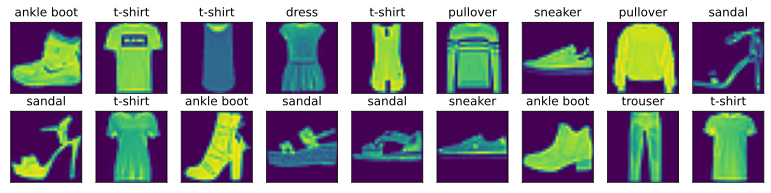

In [10]:
def get_fashion_mnist_labels(labels):  
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  # @save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if t.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes


#显示几个标签
X, y = next(iter(data.DataLoader(minst_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))


# 读取一个BATCH的数据
- 奇怪的很哦，8线程的速度还要慢于4线程。

In [14]:
BATCH_SIZE=512
N_THREADS=4
train_iter=data.DataLoader(minst_train,BATCH_SIZE,shuffle=True,num_workers=N_THREADS)


timer=Timer()
for x,y in train_iter:  
    continue
print(f'用时{timer.stop():.2f} sec')


用时4.61 sec


In [17]:
def load_data_fashion_mnist(batch_size,resize=None,n_threads=4):
    """下载fashion-MNIST数据集 将其加载到内存当中去"""
    transform=[transforms.ToTensor()]
    if resize:
        transform.insert(0,transforms.Resize(size=resize))
    trans=transforms.Compose(transform)
    mnist_train = tv.datasets.FashionMNIST(root="./dataset",train=True, transform=trans, download=True)
    mnist_test = tv.datasets.FashionMNIST(
        root="./dataset", train=False, transform=trans, download=True)
    train_loader=data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=n_threads)
    test_loader = data.DataLoader(
        mnist_test, batch_size, shuffle=True, num_workers=n_threads)
    return train_loader,test_loader

train_iter,test_iter=load_data_fashion_mnist(32,resize=64)
for data_,label_ in train_iter:
    print(data_.shape, data_.dtype, label_.shape, label_.dtype)
    break


torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


# 工程代码在SoftmaxRegression文件夹里头